Simple Kalman Filter Example

- using Kalman Filter to get voltage estimates from a battery

- voltage is a constant

- measurements will fluctuate

In [89]:
# install dependencies
# !pip install numpy matplotlib

In [80]:
import numpy as np
import matplotlib.pyplot as plt

In [81]:
# helper function to get voltage
def getVoltage():
    v = np.random.uniform(low=-4, high=4) # noise
    # actual voltage is 14.4V
    z = 14.4 + v
    return z

In [82]:
# read measurements from battery (imaginary)
def get_measurements(dt, t):
    measurements = []
    # dt = time step (s)
    # t = total seconds
    nSamples = int(t / dt)
    for _ in range(nSamples):
        measurements.append(getVoltage())

    return measurements

In [90]:
def simple_kalman(system_initial_values, estimate_and_covar_initial_values, measurements):
    # arrays for tracking
    x_estimates = []
    K_values = []
    P_values = []

    # initialize system variables
    A = system_initial_values[0] # state transition matrix (nxn matrix)
    H = system_initial_values[1] # state-to-measurement matrix (mxn matrix)
    Q = system_initial_values[2] # covariance matrix of w_k (nxn diagonal matrix)
    R = system_initial_values[3] # covariance matrix of v_k (mxm diagaonal matrix)

    # Step 0: Set initial values
    x = estimate_and_covar_initial_values[0]
    P = estimate_and_covar_initial_values[1]

    # main loop: Prediction + Estimation

    for k in range(len(measurements)):
        # Step 1: Predict State and Error Covariance
        x_pred = A @ x
        P_pred = A @ P @ A.T + Q

        # Step 2: Compute the Kalman Gain
        K = P_pred @ H.T @ np.linalg.inv(H @ P_pred @ H.T + R)

        # Step 3: Compute the Estimate
        x = x_pred + K @ (measurements[k] - H @ x_pred)

        # Step 4: Compute the Error Covariance
        P = P_pred - K @ H @ P_pred

        # add current estimate to array for tracking
        x_estimates.append(x.item())
        K_values.append(K.item())
        P_values.append(P.item())
    
    return [x, x_estimates, K_values, P_values]

In [91]:
# read voltages
voltages = get_measurements(0.2, 40)

results = simple_kalman(
    [np.array([[1]]), np.array([[1]]), np.array([[0]]), np.array([[4]])],
    [np.array([[14]]), np.array([[6]])],
    voltages
)

# use Kalman Filter to get voltage estimate
voltage = results[0]

# save estimates over time for plotting
kalman_filter_estimates = results[1]
K_values = results[2]
P_values = results[3]


print(voltage.item())

14.368958696278805


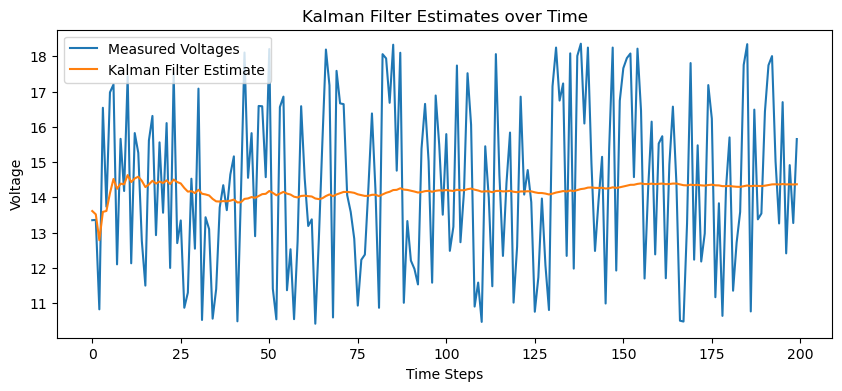

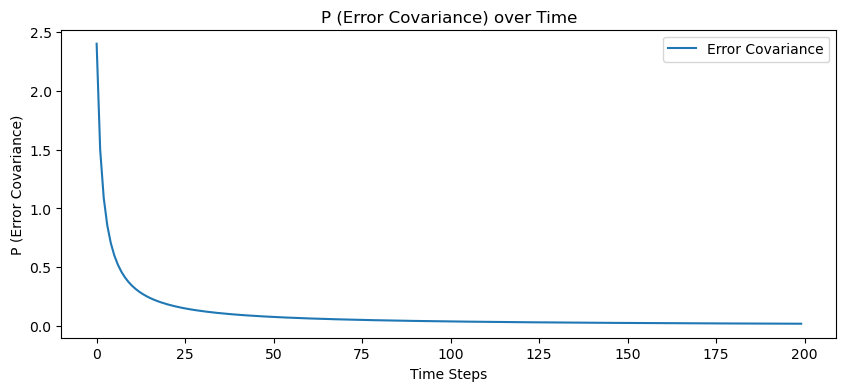

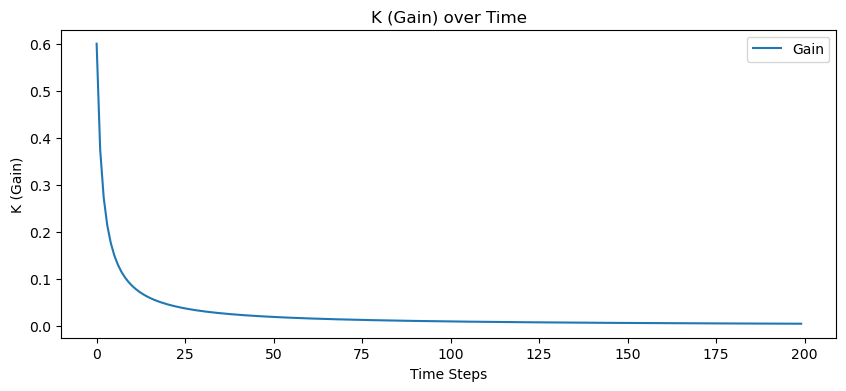

In [92]:
# plot kalman filter estimates
plt.figure(figsize=(10, 4))
plt.title("Kalman Filter Estimates over Time")
plt.plot(voltages, label="Measured Voltages")
plt.plot(kalman_filter_estimates, label="Kalman Filter Estimate")
plt.xlabel("Time Steps")
plt.ylabel("Voltage")

plt.legend()
plt.show()


# plot error covariances
plt.figure(figsize=(10, 4))
plt.title("P (Error Covariance) over Time")
plt.plot(P_values, label="Error Covariance")
plt.xlabel("Time Steps")
plt.ylabel("P (Error Covariance)")

plt.legend()
plt.show()

# plot gains
plt.figure(figsize=(10, 4))
plt.title("K (Gain) over Time")
plt.plot(K_values, label="Gain")
plt.xlabel("Time Steps")
plt.ylabel("K (Gain)")

plt.legend()
plt.show()





